**INTRODUCCION A LA PROGRAMACION CUANTICA**
-------------------------------------------------------
Prof: Carmen Pellicer Lostao</br>
[Linkedin](https://www.linkedin.com/in/cpellicerlostao/)</br>
[email](cpellicerlostao@gmail.com)

## Entorno de Programación

En este notebook vemos como podemos instalar las librerias de qiskit en un entorno distinto de IBM Quantum.

In [ ]:
%pip install 'qiskit>=1'
%pip install qiskit-ibm-runtime
%pip install qiskit[visualization]
%pip install pylatexenc  #sometimes requieres a retart of the env
%pip install qiskit-aer  #AER simulator, to run circuits without runtime

In [2]:
import qiskit

## Covenciones y cuestiones a tener en cuenta

- Los Qubits siempre se inicializan en el estado |0>

- Los Qubits y los bits se numeran con enteros de 0 a n-1 como es habitual en programacion

- Qiskit numera los bits y los qubits de derecha a izquierda ($q_{n-1},..,q_0$), es la notacion Big-endian. En los libros de texto, la notacion de Dirac y otros entornos de computacion cuántica es al reves.

- Un simulador cuántico es un ordenador clásico (CPU) que calcula cual seria el resultado de operar en una QPU ideal, teórica, sin ruidos ni imperfecciones. Los simuladores funcionan bien con un numero bajo de qubits (~30 qubits) y son una herramienta indispensable en el diseño de circuitos cuánticos.

- Los angulos son positivos cuando se miden en el sentido inverso a las agujas del reloj

- El eje Z se toma como la base estandar computacional y base de medida. No es un eje especial, simplemente una convención.

## Circuitos cuánticos

Comenzamos explorando algunas funcionalidades de Quiskit. Crearemos nuestro primer Circuito Cuántico.

Utilizamos el IBM Quantum Composer para crear un circuito cuantico que cree el estado de Bell $\frac{1}{\sqrt(2)}(|00>+|11>)$

Primero creamos dos objetos **QuantumRegister** y **ClassicalRegister** del número de qubits que necesitemos. Después creamos un objeto QuantumCircuit con los dos registros anteriores, añadimos las puertas de medida y podemos ejecutarlo en el simulador.

Copiamos el codigo y vamos a ejecutarlo en Qiskit:

In [3]:
from qiskit import QuantumRegister, ClassicalRegister

qreg= QuantumRegister(2)        #create a quantum register with 2 qubits
creg= ClassicalRegister(2)      #create a classical register with 2 classical bits

In [4]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(qreg,creg)  #creates a QuantumCircuit object that operates on a QuantumRegister ans a ClassicalRegister
circuit.h(0)                         #applies Hadamard gate to qubit 0
circuit.cx(0, 1)                     #applies a cnot gate with control qubit 0 and target qubit 1
circuit.measure(qreg,creg)           #measure all qubits in qreg and put results in creg

Revisamos la documentacion de la clase [Cirquit](https://docs.quantum.ibm.com/api/qiskit/circuit) de qiskit y podemos dibujar el circuito:

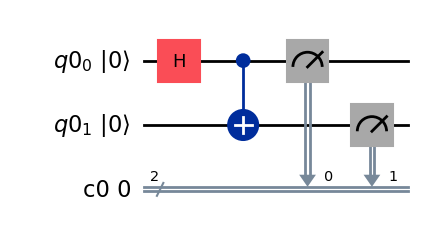

In [5]:
circuit.draw('mpl',initial_state=True)

Opciones de formato para visualizar el circuito ('text','latex','mpl','latex','latex_source'). Ver la documentacion del metodo [.draw](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#draw)

## Simulación y Medida

Ahora ejecutamos el circuito en el simulador Aer y visualizamos los resultados en un histograma.

In [6]:
from qiskit_aer import Aer

# this is the AER simulator we'll use
backend = Aer.get_backend('aer_simulator', shots=1024)
# we run the experiment and get the result from that experiment  -> memory=True to get results for each shot
result = backend.run(circuit, memory=True).result()
#in the results, we get a dictionary containing the number of times (counts)
counts = result.get_counts()
print(counts)

{'00': 529, '11': 495}


Podemos utilizar simuladores de dispositivos reales que IBM ha creado a partir de la calibracion de hardware cuantico real.

In [7]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# Get a fake backend from the fake provider
backend = FakeManilaV2()
result = backend.run(circuit, memory=True).result()
#in the results, we get a dictionary containing the number of times (counts)
counts = result.get_counts()
print(counts)

{'01': 36, '10': 119, '00': 485, '11': 384}


## Visualizacion de resultados

Muestra los primeros 5 resultados de las medidas

In [8]:
#Vemos los 5 primeros resultados de la simulacion
data = result.get_memory()
data[:5]

['11', '00', '00', '00', '11']

In [9]:
#Vemos los 10 primeros resultados de la simulacion
data = result.get_memory()
print('ALICE ------ BOB')
for e in data[:10]:
   print('   ',e[0],'------',e[1]) 

ALICE ------ BOB
    1 ------ 1
    0 ------ 0
    0 ------ 0
    0 ------ 0
    1 ------ 1
    1 ------ 0
    1 ------ 0
    0 ------ 0
    1 ------ 1
    1 ------ 1


Utiliza la funcion [`plot_histogram`](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_histogram) para mostrar los resultados obtenidos en todas las medidas

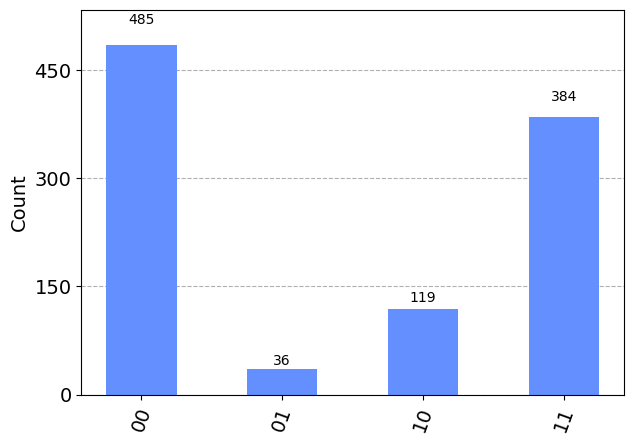

In [10]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Ejecucion en HW real

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService
mytoken='16388b54043...aa8'

service = QiskitRuntimeService(channel="ibm_quantum", token=mytoken)
service.backends()

[<IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>]

In [12]:
#buscar el menos ocupado
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)
#ver todas sus propiedades
backend.__dict__

Name: ibm_osaka
Version: 2
No. of qubits: 127



{'_options': Options(shots=4000, memory=False, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, init_qubits=True, use_measure_esp=None, noise_model=None, seed_simulator=None),
 '_provider': None,
 'name': 'ibm_osaka',
 'description': None,
 'online_date': datetime.datetime(2023, 10, 9, 4, 0, tzinfo=tzutc()),
 'backend_version': '1.0.27',
 '_coupling_map': None,
 '_instance': 'ibm-q/open/main',
 '_service': <QiskitRuntimeService>,
 '_api_client': <qiskit_ibm_runtime.api.clients.runtime.RuntimeClient at 0x7f11348dc790>,
 '_configuration': <qiskit.providers.models.backendconfiguration.PulseBackendConfiguration at 0x7f1140721300>,
 '_properties': <qiskit.providers.models.backendproperties.BackendProperties at 0x7f1165ac6bc0>,
 '_defaults': <qiskit.providers.models.pulsedefaults.PulseDefaults at 0x7f111dfcb070>,
 '_target': <qiskit.transpiler.target.Target at 0x7f111e1b4040>,
 '_max_cir

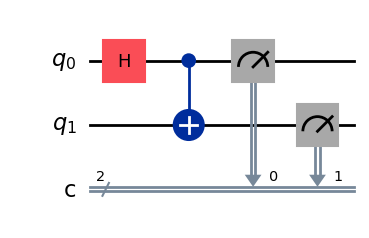

In [13]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
display(circuit.draw('mpl'))



https://docs.quantum.ibm.com/run/monitor-job

In [14]:
backend=service.backend("ibmq_qasm_simulator")
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


In [15]:
#from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=4096)

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:879: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


In [16]:
job.job_id()

'cocggticqlbvu7103sg0'

In [17]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [18]:
#obtener un job uno que ya se ejecuto
#job = service.job('co9pv250cpthsc8ufh7g')   #qasm sim
job = service.job('cr9szxfszxr00084a0v0') # osaka

In [19]:
result=job.result()
result.quasi_dists

[{0: 0.487225125867032, 1: -0.002341658153894, 2: 0.001355570445461, 3: 0.513760961841402}]

In [20]:
result=job.result()
print(f" > Quasi-probability distribution: {result.quasi_dists}")
print(f" > Metadata: {result.metadata}")

 > Quasi-probability distribution: [{0: 0.487225125867032, 1: -0.002341658153894, 2: 0.001355570445461, 3: 0.513760961841402}]
 > Metadata: [{'shots': 4096, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.239833263553225, 'readout_mitigation_time': 0.10581337101757526}]


## Aplicaciones: Q-RBG de dos secuencias binarias condicionadas

Quantum Random Bit Generators

### Primer generador

Creamos un generador de numeros aleatorios que produzca dos secuencias aleatorias examtamente iguales para dos personas Alice y Bob, con igual probabilidad de obtener 0 o 1 (al 50%)

```
ALICE -------- BOB
0  --------  0
0  --------  0
1  --------  1
1  --------  1
0  --------  0
1  --------  1
1  --------  1
.
.
.
```

Para ello creamos un circuito cuantico de dos qbits que produzca bits clasicos en cada medida para Alice y Bob.

Ejecutamos el circuito para obtener:

* los primeros 100 bits de ambas personas
* el histograma de bits medidos en la ejecucion que demuestra que se generan 0 y 1 para Alice y Bob entrelazados y al 50%


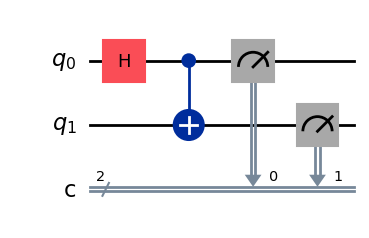

counts:  {'00': 505, '11': 519}


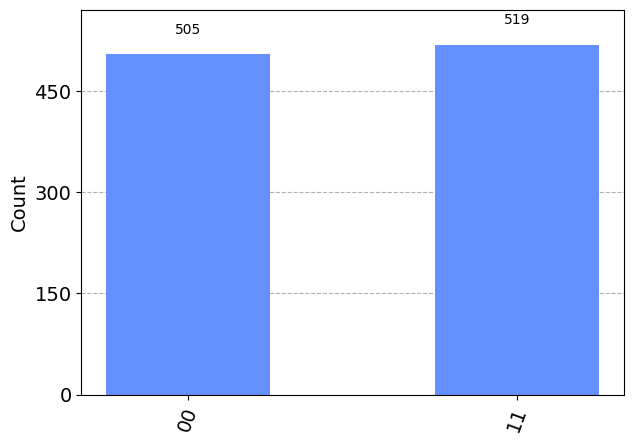

data (100 resultados):  ['11', '00', '00', '11', '11', '00', '11', '11', '11', '11', '11', '00', '11', '00', '11', '11', '00', '11', '00', '00', '00', '11', '00', '11', '11', '11', '00', '00', '00', '11', '00', '11', '11', '00', '00', '00', '00', '11', '11', '11', '11', '11', '00', '11', '00', '00', '11', '00', '11', '11', '00', '00', '11', '11', '00', '11', '11', '00', '00', '00', '11', '11', '00', '00', '11', '11', '00', '00', '11', '11', '11', '00', '11', '11', '11', '11', '11', '11', '11', '00', '00', '00', '00', '00', '11', '00', '11', '11', '00', '00', '00', '00', '11', '00', '00', '11', '00', '11', '11', '00']
ALICE -------- BOB
1  --------  1
0  --------  0
0  --------  0
1  --------  1
1  --------  1
0  --------  0
1  --------  1
1  --------  1
1  --------  1
1  --------  1
1  --------  1
0  --------  0
1  --------  1
0  --------  0
1  --------  1
1  --------  1
0  --------  0
1  --------  1
0  --------  0
0  --------  0
0  --------  0
1  --------  1
0  --------  0
1  --------

In [21]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
display(circuit.draw('mpl'))

backend = Aer.get_backend('aer_simulator', shots=1024)
#backend = FakeManilaV2()
result = backend.run(circuit, memory=True).result()
counts = result.get_counts()

print('counts: ', counts)
# visualizamos el histograma
display(plot_histogram(counts))
data = result.get_memory()
print('data (100 resultados): ',data[:100])

print('ALICE -------- BOB')
for e in data[:100]:
    print(e[0],' -------- ',e[1])

### Segundo generador

Creamos un generador de numeros aleatorios que produzca dos secuencias aleatorias examtamente para dos personas Alice y Bob, con probabilidades diferentes y entrelazadas:
- Alice obtine una secuencia con igual probabilidad de obtener 0 o 1 (al 50%)
- si Alice obtiene un 0, Bob obtiene una probabilidad de 0 y 1 al 85% y 15% respectivamente.
- si Alice ontiene un 1, Bob obtiene una probabilidad de 1 y 0 al 85% y 15% respectivamente.


```
ALICE -------- BOB
0  --------  0
0  --------  0
1  --------  0
1  --------  1
1  --------  0
0  --------  1
1  --------  1
1  --------  1
1  --------  1
0  --------  0
1  --------  1
0  --------  0
1  --------  1
1  --------  1
1  --------  1
.
.
.
```

Para ello creamos un circuito cuantico de dos qbits que produzca bits clasicos en cada medida para Alice y Bob.

Ejecutamos el circuito en un simulador cuantico y obten:

* los primeros 100 bits de ambas personas
* el histograma de bits medidos en la ejecucion

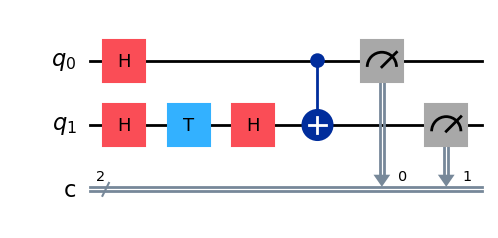

counts:  {'01': 76, '10': 84, '00': 439, '11': 425}


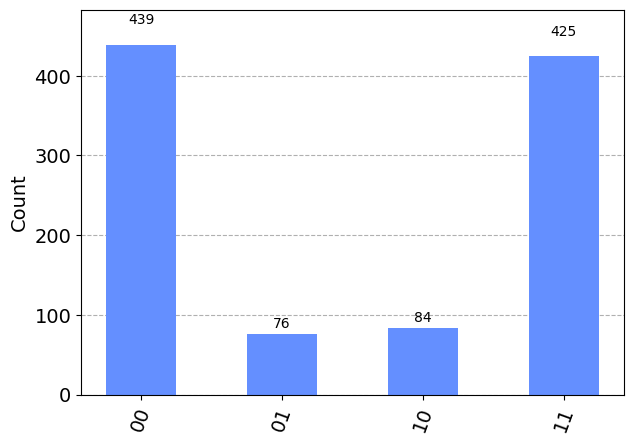

data (100 resultados):  ['11', '00', '11', '10', '00', '00', '00', '00', '11', '01', '11', '11', '00', '11', '01', '11', '00', '01', '11', '00', '01', '00', '00', '11', '10', '00', '00', '01', '00', '00', '10', '00', '11', '00', '00', '10', '11', '11', '00', '10', '11', '00', '11', '00', '00', '00', '00', '10', '11', '00', '00', '11', '00', '10', '10', '00', '11', '00', '11', '01', '00', '11', '00', '00', '11', '11', '00', '00', '01', '00', '00', '01', '10', '10', '00', '11', '00', '00', '00', '00', '11', '01', '11', '10', '01', '00', '00', '00', '11', '11', '00', '11', '11', '00', '11', '00', '10', '00', '11', '11']
ALICE -------- BOB
1  --------  1
0  --------  0
1  --------  1
1  --------  0
0  --------  0
0  --------  0
0  --------  0
0  --------  0
1  --------  1
0  --------  1
1  --------  1
1  --------  1
0  --------  0
1  --------  1
0  --------  1
1  --------  1
0  --------  0
0  --------  1
1  --------  1
0  --------  0
0  --------  1
0  --------  0
0  --------  0
1  --------

In [22]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.t(qreg_q[1])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
display(circuit.draw('mpl'))

backend = Aer.get_backend('aer_simulator', shots=1024)
#backend = FakeManilaV2()
result = backend.run(circuit, memory=True).result()
counts = result.get_counts()

print('counts: ', counts)
# visualizamos el histograma
display(plot_histogram(counts))
data = result.get_memory()
print('data (100 resultados): ',data[:100])

print('ALICE -------- BOB')
for e in data[:100]:
    print(e[0],' -------- ',e[1])